In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# from __future__ import division
from import_file import *
from helpers.parallel_helper import *
load_libs()

In [2]:
file_path = 'D:/NDAWN/table.csv'
df = pd.read_csv(file_path, skipinitialspace=True, dtype={'Year':'object', 'Month':'object', 
                                                          'Day':'object'})
df

D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (9,11,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Station Name,Latitude,Longitude,Elevation,Year,Month,Day,Hour,Avg Wind Speed,Avg Wind Speed Flag,Max Wind Speed,Max Wind Speed Flag,Avg Wind Dir,Avg Wind Dir Flag,Avg Wind Dir SD,Avg Wind Dir SD Flag
0,Baker,48.167,-99.648,1680,1993,07,28,100,5.540,E,8.393,E,316.448,E,10.349,E
1,Baker,48.167,-99.648,1680,1993,07,28,200,4.709,E,6.822,E,313.682,E,9.543,E
2,Baker,48.167,-99.648,1680,1993,07,28,300,4.428,E,6.807,E,312.301,E,10.099,E
3,Baker,48.167,-99.648,1680,1993,07,28,400,4.358,E,6.385,E,307.328,E,10.583,E
4,Baker,48.167,-99.648,1680,1993,07,28,500,4.073,E,5.891,E,307.416,E,10.193,E
5,Baker,48.167,-99.648,1680,1993,07,28,600,3.685,E,5.830,E,305.870,E,9.939,E
6,Baker,48.167,-99.648,1680,1993,07,28,700,3.758,E,5.733,E,310.738,E,11.720,E
7,Baker,48.167,-99.648,1680,1993,07,28,800,4.092,E,6.225,E,314.789,E,13.947,E
8,Baker,48.167,-99.648,1680,1993,07,28,900,4.272,E,6.389,E,312.289,E,14.794,E
9,Baker,48.167,-99.648,1680,1993,07,28,1000,4.694,E,7.204,E,314.735,E,14.640,E


In [4]:
## Output format: date, HrMn, dir, speed, speed_max
df['HrMn']=df['Hour'].apply(lambda x: "%04d"%x ) 
df['date']=df['Year']+df['Month']+df['Day']
df = df[['date','HrMn','Avg Wind Speed', 'Max Wind Speed', 'Avg Wind Dir', 'Avg Wind Dir SD']]
df.rename(columns={'Avg Wind Speed': 'speed', 'Max Wind Speed': 'speed_max', 
                   'Avg Wind Dir': 'dir', 'Avg Wind Dir SD': 'dir_std'}, inplace=True)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [5]:
df

,date,HrMn,speed,speed_max,dir,dir_std
0,19930728,0100,5.540,8.393,316.448,10.349
1,19930728,0200,4.709,6.822,313.682,9.543
2,19930728,0300,4.428,6.807,312.301,10.099
3,19930728,0400,4.358,6.385,307.328,10.583
4,19930728,0500,4.073,5.891,307.416,10.193
5,19930728,0600,3.685,5.830,305.870,9.939
6,19930728,0700,3.758,5.733,310.738,11.720
7,19930728,0800,4.092,6.225,314.789,13.947
8,19930728,0900,4.272,6.389,312.289,14.794
9,19930728,1000,4.694,7.204,314.735,14.640


In [7]:
import datetime as dt

def my_to_datetime(date_str):
    if date_str[8:10] != '24':
        return pd.to_datetime(date_str, format='%Y%m%d%H%M')

    date_str = date_str[0:8] + '00' + date_str[10:]
    return pd.to_datetime(date_str, format='%Y%m%d%H%M') + \
           dt.timedelta(days=1)
   
df['time']=df["date"].astype(str).map(str)+df["HrMn"]
df['time']=df['time'].apply(my_to_datetime)
df['date']=df['time'].apply(lambda x: x.strftime('%Y%m%d'))
df['HrMn']=df['time'].apply(lambda x: x.strftime('%H%M'))

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

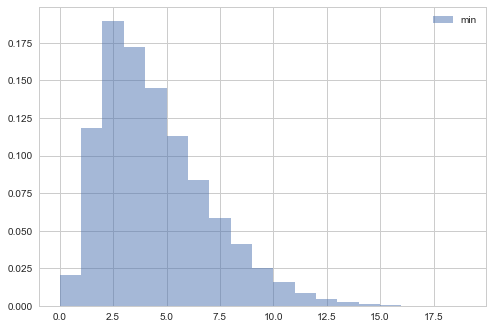

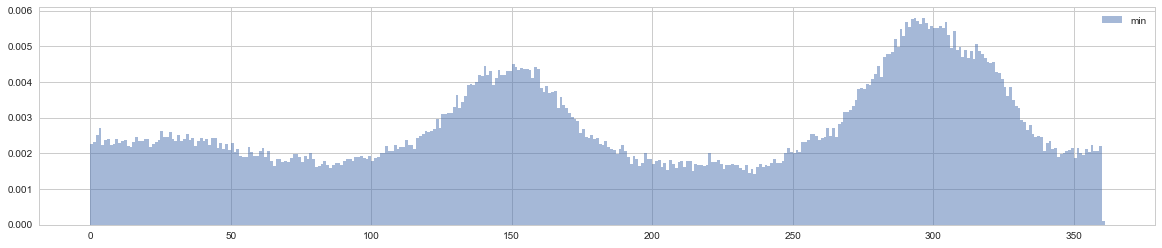

In [14]:
bins=arange(0,df['speed'].max())
df['speed'].hist(bins=bins, normed=True,alpha=0.5,label='min')
plt_configure(legend=True)

plt.figure()
bins=arange(0,362)
df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
plt_configure(legend=True, figsize=(20,4))

In [9]:
df.to_csv('D:/NDAWN/baker_hr_avg.csv', index=False, float_format='%.2f')

In [ ]:
sss

In [ ]:
gmm = [[0.670,-6.409,-4.276,9.773,10.219,-0.200],
[0.202,2.084,9.018,6.664,6.802,-0.108],
[0.128,9.989,-12.887,7.075,6.579,-0.311],]
speed_unit_text = ' (knot)'

In [ ]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [ ]:
x = [1,2,3,4]
y = [2,3,4,5]
plot(x, y )
plt_configure(xlabel="ln($V$)", ylabel="ln $P$")

In [ ]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])



In [ ]:
mpl.rcParams['patch.force_edgecolor'] = True
df.plot.scatter(x='a', y='b')

In [ ]:
sss

In [ ]:
# mpl.style.use('ggplot')

In [ ]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

df2.plot.bar()

In [ ]:
sss

In [ ]:
fig, ax = plt.subplots()
x = [1,2,3,4,5]
y = [5,2,6,7,2]
ax.set(xlabel='X Label', ylabel='Y Label', title='My Title')

In [ ]:
x = [1,2,3,4,5]
y = [5,2,6,7,2]
plot(x, y, '-', label='test')
plt_configure(title = 'This is my title', figsize=(4,4), xlabel='X name', ylabel='Y name', legend=True)

In [ ]:
# fig, ax = plt.subplots()
x = [1,2,3,4,5]
y = [5,2,6,7,2]
plot(x, y, '-', label='test')
ax = plt.gca()
ax.set_title('This is my title')
ax.set_xlabel('X name')
ax.set_ylabel('Y name')
ax.legend()
plt.gcf().set_size_inches(4,4)

In [ ]:
mpl.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
mpl.rcParams['axes.prop_cycle']

In [ ]:
prop_cycle = mpl.rcParams['axes.prop_cycle']
# prop_cycle = iter(mpl.rcParams['axes.color_cycle'])
x = [1,2,3,4,5]
y = [2,5,1,2,1]
y_menas = [3,3,3,3,3]
plot(x, y, '-', color=next(prop_cycle))
plot(x, y_menas, '--', color=next(prop_cycle))

In [ ]:
from cycler import cycler
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
offsets = np.linspace(0, 2*np.pi, 4, endpoint=False)
# Create array with shifted-sine curve along each column
yy = np.transpose([np.sin(x + phi) for phi in offsets])

# 1. Setting prop cycle on default rc parameter
plt.rc('lines', linewidth=4)
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y']) +
                           cycler('linestyle', ['-', '--', ':', '-.'])))
fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.plot(yy)
ax0.set_title('Set default color cycle to rgby')

In [ ]:
len(np.linspace(0,30))

a, b, c = test = 25, 1,3

In [ ]:
test

In [ ]:
a

In [ ]:
df = pd.read_csv('test.txt', skipinitialspace=True, sep=' ', error_bad_lines=False,
                names = ['stationID','time','vis','day_type','dir','speed','dir_max','speed_max','unname','visual_range', 'unknown'])
df

In [ ]:
df['dir'].apply(lambda x: str(x).isdigit())

In [ ]:
import pandas as pd
s = pd.Series(['0.55', '2', -3, '1234t1s1'])
pd.to_numeric(s, downcast='integer',errors='coerce' )

In [ ]:
s

In [ ]:
df = pd.read_csv('DSM/minute_avg.csv', header=0, skipinitialspace=True, dtype={'HrMn': object})

In [ ]:
df

In [ ]:
df['year'] = df['date'].apply(lambda x: str(x)[:6])
df['year'].value_counts().sort_index().plot(kind='bar', figsize=(20,4))

In [ ]:
display(df[df.duplicated('date')])

In [ ]:
gmm_em_result = [[0.670,-6.409,-4.276,9.773,10.219,-0.200],
[0.202,2.084,9.018,6.664,6.80,-0.108],
[0.128,9.989,-12.887,7.075,6.579,-0.311]]

In [ ]:
plot_gmm_ellipses(gmm_em_result)

In [ ]:
x=[1,2,3,4,5]
y=[4,5,5,2,1]
plot(x,y,'-')
plt.gca().set_xlim([1, 5])

In [ ]:
file_path = './data/NCDC/uk/tiree/dat.txt'
df = pd.read_csv(file_path,header=0, skipinitialspace=True)
df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
df = df[['date','HrMn','type','dir','speed','wind_type' ]]

In [ ]:
df = df.query("(dir <= 999) & (speed < 100) & \
              (date >= 20000000) & (date < 20160000) ")

In [ ]:
# df = pd.read_csv('DSM/DSM.csv',header=0, skipinitialspace=True, dtype={'HrMn': object})
# df['speed']=pd.to_numeric(df['speed'], downcast='integer', errors='coerce')
# df['dir']=pd.to_numeric(df['dir'], downcast='integer', errors='coerce')
# df['dir_max']=pd.to_numeric(df['dir_max'], downcast='integer', errors='coerce')
# df['speed_max']=pd.to_numeric(df['speed_max'], downcast='integer', errors='coerce')
# df = df.dropna()
# df=df[['date','HrMn','dir','speed','dir_max','speed_max']]

In [ ]:
# df['Hr']=df['HrMn'].apply(lambda x: int(str(x)[:-2]))
# df.dir = np.radians(df.dir)
# temp_df =df.groupby(['date', 'Hr']).agg({'speed' : np.mean,'dir': sp.stats.circmean,'speed_max': np.max}).reset_index()
# df.dir = np.degrees(df.dir)
# temp_df.dir = np.degrees(temp_df.dir)
# temp_df['HrMn']=temp_df['Hr'].apply(lambda x: "%02d00"%x)

In [ ]:
df

In [ ]:
def fit_weibul(df_speed):
    max_speed = df_speed.max()
    x = linspace(0, max_speed)
    data_size = len(df_speed)
    
    df_speed.hist(bins=arange(0, max_speed), alpha=0.5, label='Data', normed=True)  

    weibull_params = sp.stats.exponweib.fit(df_speed, floc=0, f0=1)
    y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
    plot(x, y_weibull, '--', color='black',label='Weibull') 

In [ ]:
temp_df = df

In [ ]:
for time_limit in [0, 20050000, 20100000]:
    plt.figure()
    df_speed=temp_df.query('date > @time_limit')['speed']
    fit_weibul(df_speed)
align_figures()

In [ ]:
sss

In [ ]:
temp_df

In [ ]:
temp_df2, speed_redistribution_info = randomize_speed(temp_df, 'up')

In [ ]:
fit_weibul(temp_df2)

In [ ]:
sss

In [ ]:
df_2016 = df.query('date >= 20150000 & date <= 20160000')

In [ ]:
# fit_weibul(df_2016)

In [ ]:
sss

In [ ]:
fig,ax = plt.subplots()

ecdf = sm.distributions.ECDF(df.speed)
x = linspace(0, df.speed.max())
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label='ECDF')

_, k_shape, _, lamb_scale = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
y=1-exp(-(x/lamb_scale)**k_shape) # cdf
plot(log(x), log(-log(1-y)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'},figsize=(4,3))

In [ ]:
ssss

In [ ]:
ssss

In [ ]:
sns.palplot(sns.color_palette("hls",10 ))

In [ ]:
sns.palplot(sns.color_palette("hls",6 ))

In [ ]:
sns.palplot(sns.color_palette("hls",4 ))

In [ ]:
sns.palplot(sns.color_palette("hls",3 ))

In [ ]:
sns.palplot(mpl.rcParams['axes.color_cycle'])

In [ ]:
sns.palplot(sns.color_palette("Blues_r"))

In [ ]:
sns.palplot(sns.cubehelix_palette(reverse=True))

In [ ]:
import matplotlib
from numpy.random import randn
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

x = randn(5000)

# Make a normed histogram. It'll be multiplied by 100 later.
plt.hist(x, bins=50, normed=True, edgecolor = "black")

# Create the formatter using the function to_percent. This multiplies all the
# default labels by 100, making them all percentages
formatter = FuncFormatter(to_percent)

# Set the formatter
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# from __future__ import division
from import_file import *
from helpers.parallel_helper import *
load_libs()

In [ ]:
prop_cycle = mpl.rcParams['axes.prop_cycle']

In [ ]:
prop_cycle